# TASK 3

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [34]:
df1=pd.read_csv("cleaned_data.csv")
df1

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Nb of sec with 6250B < Vol DL < 31250Bc
0,1.311450e+19,04-04-2019 12:01,770.0,25-04-2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0,965.464756
1,1.311450e+19,09-04-2019 13:04,235.0,25-04-2019 08:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0,965.464756
2,1.311450e+19,09-04-2019 17:42,1.0,25-04-2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,14699576.00,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0,965.464756
3,1.311450e+19,10-04-2019 00:31,486.0,25-04-2019 07:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,15146643.00,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0,965.464756
4,1.311450e+19,12-04-2019 20:10,565.0,25-04-2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,18962873.00,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0,965.464756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,29-04-2019 07:28,451.0,30-04-2019 06:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0,965.464756
149997,7.349880e+18,29-04-2019 07:28,483.0,30-04-2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0,965.464756
149998,1.311450e+19,29-04-2019 07:28,283.0,30-04-2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0,965.464756
149999,1.311450e+19,29-04-2019 07:28,696.0,30-04-2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0,965.464756


# TASK 3.1

__Aggregate, per customer, the following information (treat missing & outliers by replacing with the mean or the mode of the corresponding variable)__

In [35]:
df1.isnull().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

__Average TCP retransmission__

In [36]:
avg_tcp_re= df1.groupby('MSISDN/Number')['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)'].mean().reset_index()
avg_tcp_re['Average TCP retransmission'] = avg_tcp_re[['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)']].mean(axis=1)
print(avg_tcp_re[['MSISDN/Number','Average TCP retransmission']].head())

   MSISDN/Number  Average TCP retransmission
0   3.360100e+10                1.078479e+07
1   3.360100e+10                1.078479e+07
2   3.360100e+10                1.078479e+07
3   3.360101e+10                3.803623e+05
4   3.360101e+10                7.735101e+06


__Average RTT__

In [6]:
avg_rtt_per_c= df1.groupby('MSISDN/Number')['Avg RTT DL (ms)','Avg RTT UL (ms)'].mean().reset_index()
avg_rtt_per_c['Average RTT'] = avg_rtt_per_c[['Avg RTT DL (ms)','Avg RTT UL (ms)']].mean(axis=1)
print(avg_rtt_per_c[['MSISDN/Number','Average RTT']].head())

   MSISDN/Number  Average RTT
0   3.360100e+10    23.000000
1   3.360100e+10    15.500000
2   3.360100e+10    63.729294
3   3.360101e+10    42.000000
4   3.360101e+10    29.750000


__Handset type__

In [37]:
Handset_type  = df1.groupby('MSISDN/Number').agg({'Handset Type' : 'first'}).reset_index()
Top10_Handset_type = Handset_type['Handset Type'].value_counts().head(10)
print("Top10_Handset_type:")
print(Top10_Handset_type)

Top10_Handset_type:
Huawei B528S-23A                10615
Apple iPhone 6S (A1688)          6759
undefined                        6670
Apple iPhone 6 (A1586)           6260
Apple iPhone 7 (A1778)           4699
Apple iPhone Se (A1723)          3754
Apple iPhone 8 (A1905)           3543
Samsung Galaxy S8 (Sm-G950F)     3245
Apple iPhone Xr (A2105)          3072
Samsung Galaxy J5 (Sm-J530)      2748
Name: Handset Type, dtype: int64


__Average throughput__

In [44]:
avg_throughput_per_c= df1.groupby('MSISDN/Number').agg({'Avg Bearer TP DL (kbps)':'mean','Avg Bearer TP DL (kbps)':'mean'})
print((avg_throughput_per_c).head())


               Avg Bearer TP DL (kbps)
MSISDN/Number                         
3.360100e+10                      37.0
3.360100e+10                      48.0
3.360100e+10                      48.0
3.360101e+10                     204.0
3.360101e+10                   20197.5


# Task 3.2

__Compute & list 10 of the top, bottom and most frequent:__


In [64]:
df1["Total TCP"]=df1['TCP DL Retrans. Vol (Bytes)']+ df1['TCP UL Retrans. Vol (Bytes)']+df1['TCP DL Retrans. Vol (Bytes)']+ df1['TCP UL Retrans. Vol (Bytes)']
df1["Total RTT"]=df1['Avg RTT DL (ms)']+df1['Avg RTT UL (ms)']
df1["Total Throughput"]=df1['DL TP < 50 Kbps (%)']+df1['50 Kbps < DL TP < 250 Kbps (%)']+df1['250 Kbps < DL TP < 1 Mbps (%)']+df1['DL TP > 1 Mbps (%)']+df1['UL TP < 10 Kbps (%)']+df1['10 Kbps < UL TP < 50 Kbps (%)']+df1['50 Kbps < UL TP < 300 Kbps (%)']+df1['UL TP > 300 Kbps (%)']


exp_agg_customer = df1.groupby('MSISDN/Number').agg({'Total TCP': 'sum',
                                                                          'Total RTT': 'sum',
                                                                          'Total Throughput': 'sum', 
                                                                           'Handset Type': lambda x: x.mode()[0]})

exp_agg_customer

,Total TCP,Total RTT,Total Throughput,Handset Type
MSISDN/Number,,,,
3.360100e+10,4.313915e+07,46.000000,200.000000,Huawei P20 Lite Huawei Nova 3E
3.360100e+10,4.313915e+07,31.000000,200.000000,Apple iPhone 7 (A1778)
3.360100e+10,4.313915e+07,127.458589,200.000000,undefined
3.360101e+10,1.521449e+06,84.000000,200.000000,Apple iPhone 5S (A1457)
3.360101e+10,6.188081e+07,119.000000,396.000000,Apple iPhone Se (A1723)
...,...,...,...,...
3.379000e+10,4.313915e+07,40.000000,200.000000,Apple iPhone 8 Plus (A1897)
4.188282e+10,3.620983e+10,329526.164724,211259.542564,Huawei B528S-23A
3.197020e+12,4.313915e+07,127.458589,199.533802,Quectel Wireless. Quectel Ec25-E


__1) TCP values in the dataset__ 

__TOP 10__

In [68]:
tcp_trans = exp_agg_customer.sort_values(by=['Total TCP'], ascending=False)

top_10_tcp = tcp_trans.head(10)
bot_10_tcp = tcp_trans.tail(10)
most_tcp_frq = tcp_trans['Total TCP'].value_counts().head(10)
most_tcp_frq
top_10_tcp[['Total TCP']].reset_index()

,MSISDN/Number,Total TCP
0,4.188282e+10,3.620983e+10
1,3.366773e+10,1.670842e+10
2,3.365908e+10,1.588372e+10
3,3.366098e+10,1.474980e+10
4,3.376128e+10,1.208796e+10
5,3.376264e+10,1.175998e+10
6,3.365066e+10,1.118673e+10
7,3.366318e+10,1.113386e+10
8,3.366905e+10,1.039157e+10
9,3.376357e+10,1.035892e+10


__BOTTOM 10__

In [69]:
bot_10_tcp[['Total TCP']].reset_index()

,MSISDN/Number,Total TCP
0,3.369969e+10,364.0
1,3.367937e+10,358.0
2,3.378420e+10,354.0
3,3.365068e+10,352.0
4,3.376964e+10,352.0
5,3.360783e+10,286.0
6,3.362636e+10,268.0
7,3.376206e+10,258.0
8,3.361478e+10,256.0
9,3.365013e+10,194.0


__Most_Frequent__

In [70]:
most_tcp_frq.reset_index()

,index,Total TCP
0,4.313915e+07,47125
1,8.627829e+07,7468
2,1.294174e+08,1032
3,4.162242e+07,363
4,1.725566e+08,252
5,4.162249e+07,167
6,1.521977e+06,145
7,8.476156e+07,82
8,4.162246e+07,81
9,1.524637e+06,78


__2) RTT values in the dataset__ 

__TOP_10__

In [73]:
tcp_rtt = exp_agg_customer.sort_values(by=['Total RTT'], ascending=False)

top_10_rtt = tcp_rtt.head(10)
bot_10_rtt = tcp_rtt.tail(10)
most_rtt_frq = tcp_rtt['Total RTT'].value_counts().head(10)

top_10_rtt[['Total RTT']].reset_index()

,MSISDN/Number,Total RTT
0,4.188282e+10,329526.164724
1,3.366232e+10,96924.000000
2,3.366087e+10,64670.000000
3,3.368369e+10,54848.000000
4,3.369855e+10,46021.000000
5,3.376181e+10,37084.000000
6,3.366879e+10,36304.000000
7,3.376094e+10,27278.000000
8,3.360679e+10,26300.000000
9,3.367182e+10,25715.000000


__BOTTOM 10__

In [74]:
bot_10_rtt[['Total RTT']].reset_index()

,MSISDN/Number,Total RTT
0,3.363468e+10,10.0
1,3.361085e+10,9.0
2,3.367220e+10,9.0
3,3.364768e+10,8.0
4,3.366862e+10,6.0
5,3.365949e+10,5.0
6,3.369505e+10,4.0
7,3.366020e+10,2.0
8,3.366158e+10,0.0
9,3.365298e+10,0.0


__Most_frequent__

In [76]:
most_rtt_frq.reset_index()

,index,Total RTT
0,127.458589,16353
1,29.000000,2736
2,39.000000,2162
3,254.917178,1908
4,38.000000,1446
5,30.000000,1419
6,40.000000,1383
7,28.000000,1330
8,49.000000,1194
9,31.000000,1053


__3) Throughput values in the dataset__

__Top10__

In [77]:
tcp_throuput = exp_agg_customer.sort_values(by=['Total Throughput'], ascending=False)

top_10_throuput = tcp_throuput.head(10)
bot_10_throuput = tcp_throuput.tail(10)
most_rtt_throuput = tcp_throuput['Total Throughput'].value_counts().head(10)

top_10_throuput[['Total Throughput']].reset_index()

,MSISDN/Number,Total Throughput
0,4.188282e+10,211259.542564
1,3.362632e+10,3576.000000
2,3.362578e+10,3375.000000
3,3.361489e+10,3367.000000
4,3.365973e+10,3166.000000
5,3.376054e+10,2986.000000
6,3.367588e+10,2975.000000
7,3.366716e+10,2571.000000
8,3.362708e+10,2385.000000
9,3.378632e+10,2381.964415


__Bottom10__

In [78]:
bot_10_throuput[['Total Throughput']].reset_index()

,MSISDN/Number,Total Throughput
0,3.376207e+10,194.0
1,3.366725e+10,194.0
2,3.365970e+10,194.0
3,3.366971e+10,194.0
4,3.365051e+10,194.0
5,3.366782e+10,194.0
6,3.366034e+10,194.0
7,3.376213e+10,194.0
8,3.366309e+10,194.0
9,3.366255e+10,194.0


__Most_Frequent__

In [79]:
most_rtt_throuput.reset_index()

,index,Total Throughput
0,200.0,47778
1,197.0,12735
2,400.0,7141
3,198.0,6694
4,196.0,5214
5,397.0,4925
6,199.0,3878
7,396.0,2452
8,398.0,2195
9,399.0,1114


#  Task 3.3 - Compute & report

__1-The distribution of the average throughput per handset type and provide interpretation for your findings__
__2-The average TCP retransmission view per handset type and provide interpretation for your findings__

In [81]:
handset_type_df = exp_agg_customer.groupby('Handset Type').agg(
    {'Total Throughput': 'mean', 'Total TCP': 'mean'})
handset_type_df.head()

,Total Throughput,Total TCP
Handset Type,,
A-Link Telecom I. Cubot A5,196.0,4.313915e+07
A-Link Telecom I. Cubot Note Plus,199.0,1.232426e+06
A-Link Telecom I. Cubot Note S,197.0,8.282346e+07
A-Link Telecom I. Cubot Nova,196.0,2.743400e+05
A-Link Telecom I. Cubot Power,197.0,1.608200e+04


In [83]:
sorted_by_tp = handset_type_df.sort_values(
    'Total Throughput', ascending=False)
top_tp = sorted_by_tp['Total Throughput']

top_tp.head().reset_index()

,Handset Type,Total Throughput
0,Huawei Me909S-120,698.766901
1,Huawei B618S-22D,660.378402
2,Apple iPhone Xr (A2106),598.500000
3,Huawei Evr-Al00,598.000000
4,D-Link Corporati. D-Link Lte Usb Adaptor,597.000000


In [84]:
sorted_by_tcp = handset_type_df.sort_values(
    'Total TCP', ascending=False)
top_tcp = sorted_by_tcp['Total TCP']

top_tcp.head().reset_index()

,Handset Type,Total TCP
0,Lg Lg-H635,1.825098e+09
1,Huawei Bln-Al10,6.583492e+08
2,Asustek Asus Zenfone Selfie Zd551Kl,6.433166e+08
3,Samsung Galaxy Tab S3 (Sm-T825),5.069907e+08
4,Huawei E5776S-32,4.220734e+08


# Task 3.4

__Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)__

In [85]:
exp_agg_customer.head()

,Total TCP,Total RTT,Total Throughput,Handset Type
MSISDN/Number,,,,
3.360100e+10,4.313915e+07,46.000000,200.0,Huawei P20 Lite Huawei Nova 3E
3.360100e+10,4.313915e+07,31.000000,200.0,Apple iPhone 7 (A1778)
3.360100e+10,4.313915e+07,127.458589,200.0,undefined
3.360101e+10,1.521449e+06,84.000000,200.0,Apple iPhone 5S (A1457)
3.360101e+10,6.188081e+07,119.000000,396.0,Apple iPhone Se (A1723)


In [86]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans


def normalizer(df, columns):
    norm = Normalizer()
    return pd.DataFrame(norm.fit_transform(df), columns=columns)

def scaler(df, columns):
    minmax_scaler = MinMaxScaler()
    return pd.DataFrame(minmax_scaler.fit_transform(df), columns=columns)

def scale_and_normalize(df,columns ):
    return normalizer(scaler(df, columns), columns)

def cluser_label(x: int, cols: list = []) -> str:
    if (not type(x) == int):
        return x
    if (x < len(cols)):
        return cols[x]

    return str(x)

In [87]:
metrics = exp_agg_customer[[ 'Total TCP','Total RTT', 'Total Throughput']]
normalized_metrics = scale_and_normalize(metrics, [ 'Total TCP','Total RTT', 'Total Throughput'])
normalized_metrics.describe()

,Total TCP,Total RTT,Total Throughput
count,106857.000000,106857.000000,106857.000000
mean,0.722447,0.389796,0.170791
std,0.350307,0.340806,0.241039
min,0.000000,0.000000,0.000000
25%,0.503420,0.113847,0.022689
50%,0.921971,0.296282,0.023802
75%,0.989348,0.637184,0.363019
max,1.000000,1.000000,0.993818


In [89]:
kmeans = KMeans(n_clusters=3, init='k-means++').fit(normalized_metrics)
pred = kmeans.predict(normalized_metrics)

exp_metrics_with_cluster = exp_agg_customer.copy()
exp_metrics_with_cluster['clusters'] = pred
exp_metrics_with_cluster['clusters'].value_counts()

0    54341
2    26739
1    25777
Name: clusters, dtype: int64

In [91]:
exp_metrics_with_cluster = exp_metrics_with_cluster.rename(columns={'Total TCP': 'Total_TCP', 'Total RTT': 'Total_RTT','Total Throughput':'Total_Throughput'})

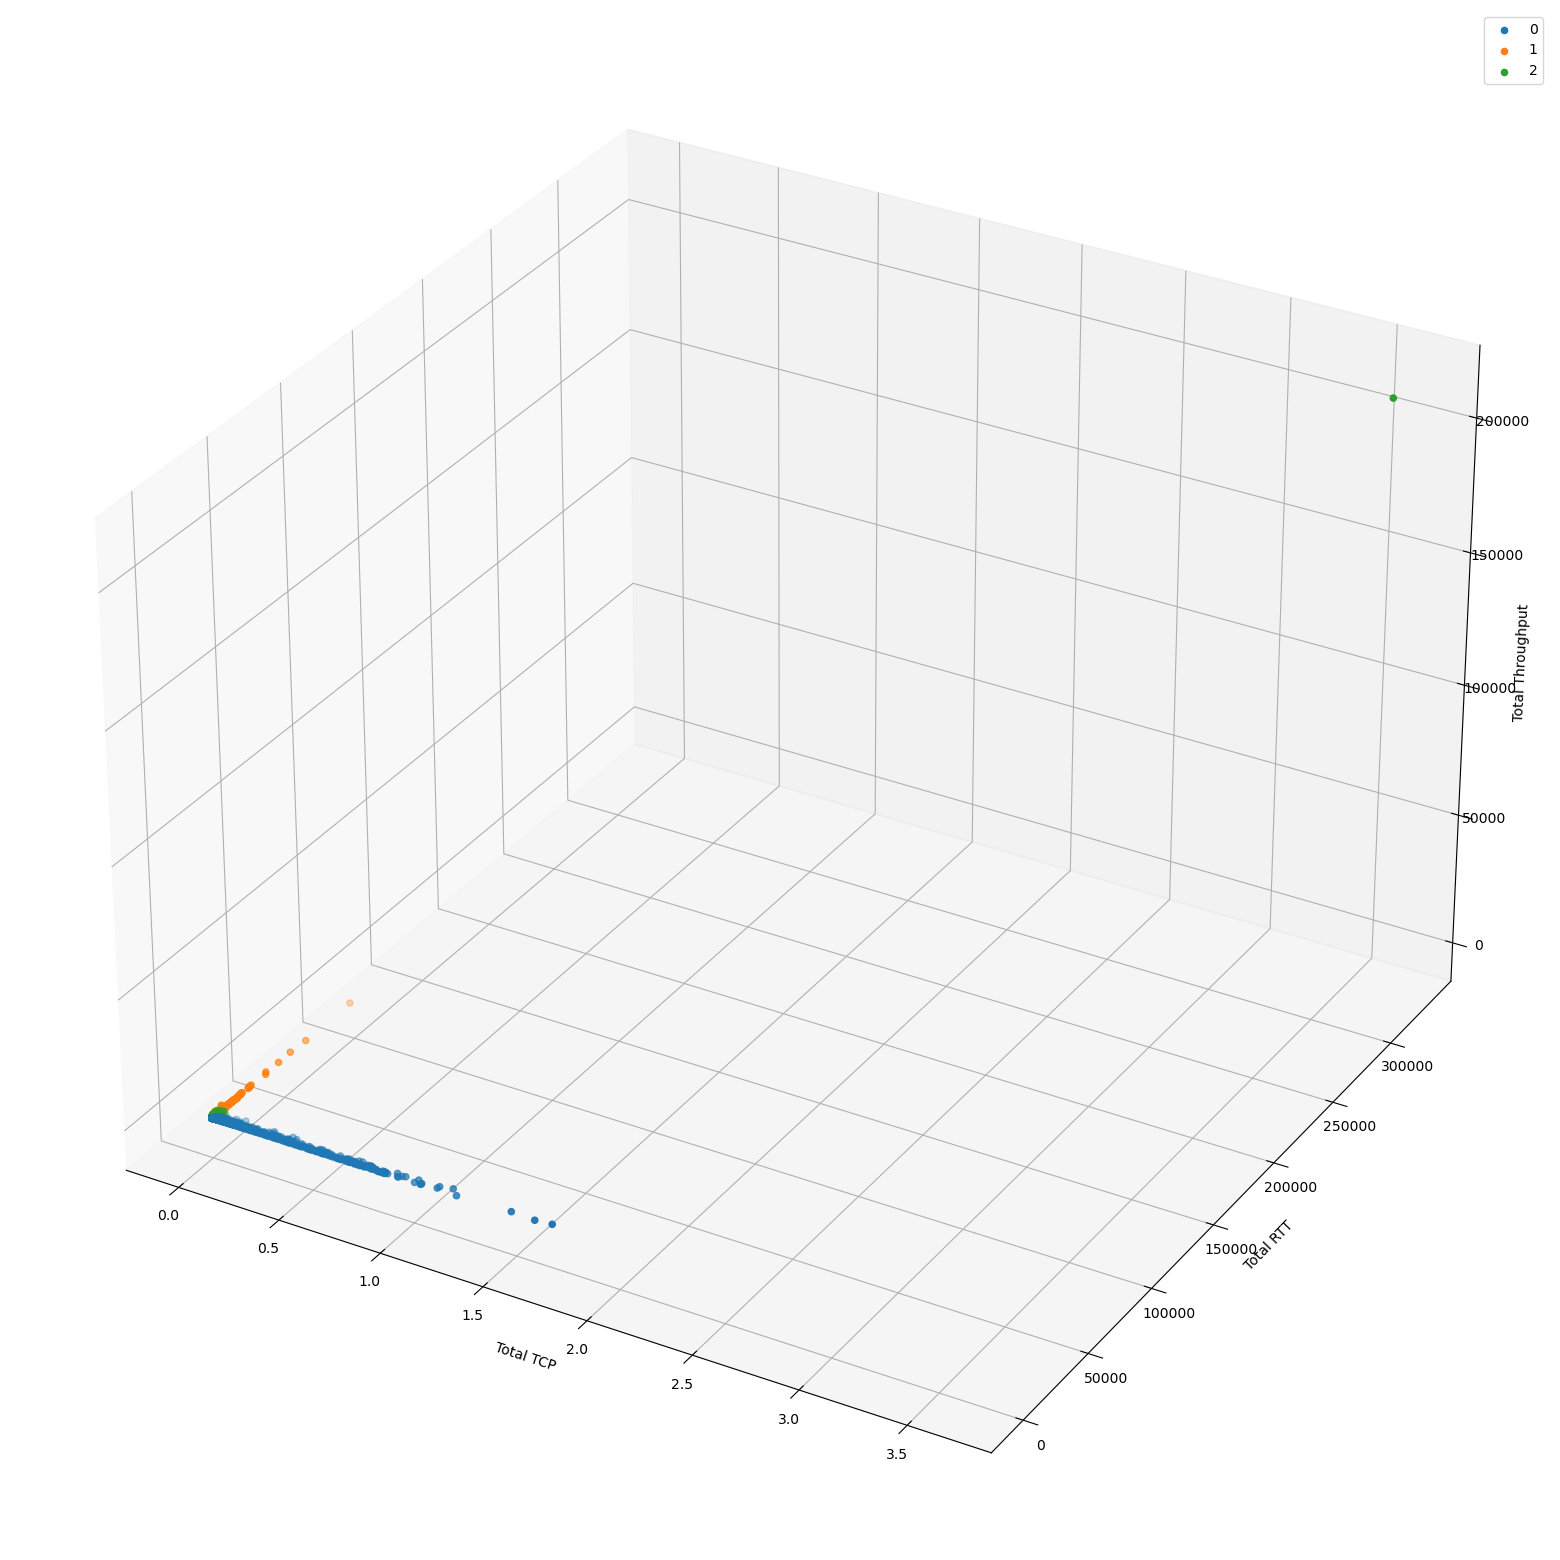

In [92]:
from matplotlib import cm
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111,projection='3d')
for s in exp_metrics_with_cluster.clusters.unique():
    ax.scatter(exp_metrics_with_cluster.Total_TCP[exp_metrics_with_cluster.clusters==s],exp_metrics_with_cluster.Total_RTT[exp_metrics_with_cluster.clusters==s],exp_metrics_with_cluster.Total_Throughput[exp_metrics_with_cluster.clusters==s],label=s)
    ax.set_xlabel('Total TCP')
    ax.set_ylabel('Total RTT')
    ax.set_zlabel('Total Throughput')
    ax.legend()